In [156]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [157]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
#path_ehcvm = "D:/Shares/DMCI/Output_ehcvm/EHCVM Base améliorée 1.1"

In [159]:
train = pd.read_csv("Train_urb_V1.1.csv")


In [160]:
train.head()

,log_hhsize,region,fer_electrique,fer_charbon,bonbonne_gaz,ventilo,voiture,ordinateur,frigo,type_logement,...,sexe,mode_evac_ordure,type_sanitaire,partage_sanitaire,excrement_hors_concess,evac_eau_usees,milieu,pauvre,hhid,source
0,2.302585,14,2,2,2,1,2,2,2,2,...,2,5,1,2,4.0,4,1.0,0,59213.0,0
1,1.609438,14,2,2,2,2,2,2,2,2,...,2,5,2,2,2.0,4,1.0,1,59212.0,0
2,1.609438,14,2,2,2,1,2,2,2,2,...,2,2,1,2,4.0,4,1.0,0,59211.0,0
3,2.397895,14,2,2,2,2,2,2,2,2,...,1,2,2,2,NaN,3,1.0,1,59208.0,0
4,1.386294,14,2,1,1,1,2,1,1,2,...,1,5,2,2,2.0,3,1.0,0,59207.0,0


In [161]:
train.set_index("hhid", inplace=True)

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3138 entries, 59213.0 to 203.0
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_hhsize              3138 non-null   float64
 1   region                  3138 non-null   int64  
 2   fer_electrique          3138 non-null   int64  
 3   fer_charbon             3138 non-null   int64  
 4   bonbonne_gaz            3138 non-null   int64  
 5   ventilo                 3138 non-null   int64  
 6   voiture                 3138 non-null   int64  
 7   ordinateur              3138 non-null   int64  
 8   frigo                   3138 non-null   int64  
 9   type_logement           3138 non-null   int64  
 10  statut_occup            3138 non-null   int64  
 11  eclairage               3131 non-null   float64
 12  materiau_toit           3138 non-null   int64  
 13  nature_sol              3138 non-null   int64  
 14  source_eau_ss           3138 non-null 

In [163]:
train.describe(include="all")

,log_hhsize,region,fer_electrique,fer_charbon,bonbonne_gaz,ventilo,voiture,ordinateur,frigo,type_logement,...,educ_hi,sexe,mode_evac_ordure,type_sanitaire,partage_sanitaire,excrement_hors_concess,evac_eau_usees,milieu,pauvre,source
count,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,...,3138.000000,3138.000000,3138.000000,3138.000000,3138.000000,2553.000000,3138.000000,3138.0,3138.000000,3138.0
mean,1.877876,6.164755,1.941364,1.469407,1.350223,1.388145,1.945188,1.907266,1.533142,1.814213,...,2.528999,1.354366,2.420013,1.482154,1.801466,1.656483,2.898343,1.0,0.215743,0.0
std,0.697724,4.286066,0.234980,0.499143,0.477116,0.487406,0.227649,0.290106,0.498980,0.543512,...,2.319813,0.478397,1.258497,0.629095,0.398960,1.120788,1.248598,0.0,0.411402,0.0
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.0
25%,1.609438,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.0,0.000000,0.0
50%,1.945910,6.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.0,0.000000,0.0
75%,2.302585,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,4.000000,1.0,0.000000,0.0
max,3.970292,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,...,9.000000,2.000000,6.000000,5.000000,2.000000,5.000000,5.000000,1.0,1.000000,0.0


In [164]:
train.isna().sum()

log_hhsize                  0
region                      0
fer_electrique              0
fer_charbon                 0
bonbonne_gaz                0
ventilo                     0
voiture                     0
ordinateur                  0
frigo                       0
type_logement               0
statut_occup                0
eclairage                   7
materiau_toit               0
nature_sol                  0
source_eau_ss               0
materiau_mur                0
tx_promiscuite              0
dem_emp_rate                0
activ12m                    0
age                         0
educ_hi                     0
sexe                        0
mode_evac_ordure            0
type_sanitaire              0
partage_sanitaire           0
excrement_hors_concess    585
evac_eau_usees              0
milieu                      0
pauvre                      0
source                      0
dtype: int64

In [165]:
train.pauvre.value_counts(dropna=False)

pauvre
0    2461
1     677
Name: count, dtype: int64

In [166]:
#train["pauvre"] = train["pauvre"].astype("int").apply(lambda x : 1 if x==2 else 0)

In [167]:
train.pauvre.value_counts(dropna=False)

pauvre
0    2461
1     677
Name: count, dtype: int64

In [168]:
test = pd.read_csv("Test_urb_V1.1.csv")

In [169]:
test.set_index("hhid", inplace=True)

In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 59210.0 to 201.0
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_hhsize              784 non-null    float64
 1   region                  784 non-null    int64  
 2   fer_electrique          784 non-null    int64  
 3   fer_charbon             784 non-null    int64  
 4   bonbonne_gaz            784 non-null    int64  
 5   ventilo                 784 non-null    int64  
 6   voiture                 784 non-null    int64  
 7   ordinateur              784 non-null    int64  
 8   frigo                   784 non-null    int64  
 9   type_logement           784 non-null    int64  
 10  statut_occup            784 non-null    int64  
 11  eclairage               781 non-null    float64
 12  materiau_toit           784 non-null    int64  
 13  nature_sol              784 non-null    int64  
 14  source_eau_ss           784 non-null   

In [171]:
test.isna().sum()

log_hhsize                  0
region                      0
fer_electrique              0
fer_charbon                 0
bonbonne_gaz                0
ventilo                     0
voiture                     0
ordinateur                  0
frigo                       0
type_logement               0
statut_occup                0
eclairage                   3
materiau_toit               0
nature_sol                  0
source_eau_ss               0
materiau_mur                0
tx_promiscuite              0
dem_emp_rate                0
activ12m                    0
age                         0
educ_hi                     0
sexe                        0
mode_evac_ordure            0
type_sanitaire              0
partage_sanitaire           0
excrement_hors_concess    154
evac_eau_usees              0
milieu                      0
pauvre                      0
source                      0
dtype: int64

In [172]:
#test["pauvre"] = test["pauvre"].astype("int").apply(lambda x : 1 if x==2 else 0)

In [173]:
test.pauvre.value_counts()

pauvre
0    615
1    169
Name: count, dtype: int64

In [174]:
#data = data.drop(columns = ["hhid","moutons_n", "chevres_n"], axis=1)

In [175]:
#train["age_2"] = train["age"]**2

In [176]:
#test["age_2"] = test["age"]**2

In [177]:
eh_col = train.columns.to_list()

In [178]:
eh_col

['log_hhsize',
 'region',
 'fer_electrique',
 'fer_charbon',
 'bonbonne_gaz',
 'ventilo',
 'voiture',
 'ordinateur',
 'frigo',
 'type_logement',
 'statut_occup',
 'eclairage',
 'materiau_toit',
 'nature_sol',
 'source_eau_ss',
 'materiau_mur',
 'tx_promiscuite',
 'dem_emp_rate',
 'activ12m',
 'age',
 'educ_hi',
 'sexe',
 'mode_evac_ordure',
 'type_sanitaire',
 'partage_sanitaire',
 'excrement_hors_concess',
 'evac_eau_usees',
 'milieu',
 'pauvre',
 'source']

In [179]:
### data.head()
# columns from sensus data 
rg_col = [ 'ventilo', 'bonbonne_gaz', 'indiv_id',
       'log_hhsize', 'eclairage', 'materiau_toit', 'nature_sol',
       'source_eau_ss', 'materiau_mur', 'region', 'fer_electrique',
       'fer_charbon', 'ordinateur', 'frigo', 'voiture', 'type_logement',
       'nbr_piece_hbt', 'statut_occup', 'tx_promiscuite', 'lien', 'sexe',
       'age', 'activ12m', 'partage_sanitaire', 'mode_evac_ordure',
       'evac_eau_usees', 'type_sanitaire',
       'dem_emp_rate']

In [180]:
col_dispo = list(set(eh_col).intersection(set(rg_col)))

In [181]:
col_dispo

['tx_promiscuite',
 'activ12m',
 'materiau_toit',
 'region',
 'fer_electrique',
 'statut_occup',
 'partage_sanitaire',
 'ordinateur',
 'log_hhsize',
 'frigo',
 'source_eau_ss',
 'nature_sol',
 'sexe',
 'age',
 'type_logement',
 'voiture',
 'type_sanitaire',
 'evac_eau_usees',
 'ventilo',
 'materiau_mur',
 'fer_charbon',
 'bonbonne_gaz',
 'dem_emp_rate',
 'eclairage',
 'mode_evac_ordure']

In [182]:
col_dispo.append("pauvre")

In [183]:
col_dispo

['tx_promiscuite',
 'activ12m',
 'materiau_toit',
 'region',
 'fer_electrique',
 'statut_occup',
 'partage_sanitaire',
 'ordinateur',
 'log_hhsize',
 'frigo',
 'source_eau_ss',
 'nature_sol',
 'sexe',
 'age',
 'type_logement',
 'voiture',
 'type_sanitaire',
 'evac_eau_usees',
 'ventilo',
 'materiau_mur',
 'fer_charbon',
 'bonbonne_gaz',
 'dem_emp_rate',
 'eclairage',
 'mode_evac_ordure',
 'pauvre']

In [184]:
cat_col = ['frigo',
 'sexe',
 'region',
 'type_logement',
 'materiau_mur',
 'nature_sol',
 'ordinateur',
 'source_eau_ss',
 'activ12m',
 'ventilo',
 'evac_eau_usees',
 'voiture',
 'statut_occup',
 'type_sanitaire',
 'materiau_toit',
 'fer_charbon',
 'bonbonne_gaz',
 'eclairage',
 'mode_evac_ordure',
 'fer_electrique']

In [185]:
# convert to categorical data type for columns in 'rg_col'
train[cat_col] = train[cat_col].astype('category')

In [186]:
test[cat_col] = test[cat_col].astype('category')

In [187]:
train['partage_sanitaire'] = train['partage_sanitaire'].astype('object')

In [188]:
test['partage_sanitaire'] = test['partage_sanitaire'].astype('object')

In [189]:
train[col_dispo]

,tx_promiscuite,activ12m,materiau_toit,region,fer_electrique,statut_occup,partage_sanitaire,ordinateur,log_hhsize,frigo,...,type_sanitaire,evac_eau_usees,ventilo,materiau_mur,fer_charbon,bonbonne_gaz,dem_emp_rate,eclairage,mode_evac_ordure,pauvre
hhid,,,,,,,,,,,,,,,,,,,,,
59213.0,2.000000,1,2,14,2,2,2,2,2.302585,2,...,1,4,1,4,2,2,20.000000,1.0,5,0
59212.0,1.000000,2,3,14,2,2,2,2,1.609438,2,...,2,4,2,2,2,2,40.000000,4.0,5,1
59211.0,0.833333,2,1,14,2,2,2,2,1.609438,2,...,1,4,1,4,2,2,20.000000,1.0,2,0
59208.0,1.375000,2,3,14,2,2,2,2,2.397895,2,...,2,3,2,2,2,2,36.363636,3.0,2,1
59207.0,1.000000,2,3,14,2,2,2,1,1.386294,1,...,2,3,1,1,1,1,50.000000,1.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208.0,1.000000,2,1,1,2,4,1,2,0.000000,1,...,1,2,1,1,2,2,100.000000,1.0,2,0
206.0,1.000000,1,1,1,1,4,2,2,1.098612,1,...,1,2,1,1,1,1,0.000000,1.0,2,0
205.0,3.000000,2,2,1,2,4,1,2,1.098612,2,...,1,2,2,1,2,1,66.666667,1.0,2,0


In [190]:
#from  sklearn.model_selection import train_test_split

In [191]:
#train, test  = train_test_split(data, test_size=0.3, stratify=data["pauvre"], random_state=42)

In [192]:
#train[col_dispo].to_csv("D:/Shares/DMCI/EHCVM-2/train.csv")
#test[col_dispo].to_csv("D:/Shares/DMCI/EHCVM-2/test.csv")

In [193]:
train = TabularDataset(train[col_dispo])

In [194]:
train

,tx_promiscuite,activ12m,materiau_toit,region,fer_electrique,statut_occup,partage_sanitaire,ordinateur,log_hhsize,frigo,...,type_sanitaire,evac_eau_usees,ventilo,materiau_mur,fer_charbon,bonbonne_gaz,dem_emp_rate,eclairage,mode_evac_ordure,pauvre
hhid,,,,,,,,,,,,,,,,,,,,,
59213.0,2.000000,1,2,14,2,2,2,2,2.302585,2,...,1,4,1,4,2,2,20.000000,1.0,5,0
59212.0,1.000000,2,3,14,2,2,2,2,1.609438,2,...,2,4,2,2,2,2,40.000000,4.0,5,1
59211.0,0.833333,2,1,14,2,2,2,2,1.609438,2,...,1,4,1,4,2,2,20.000000,1.0,2,0
59208.0,1.375000,2,3,14,2,2,2,2,2.397895,2,...,2,3,2,2,2,2,36.363636,3.0,2,1
59207.0,1.000000,2,3,14,2,2,2,1,1.386294,1,...,2,3,1,1,1,1,50.000000,1.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208.0,1.000000,2,1,1,2,4,1,2,0.000000,1,...,1,2,1,1,2,2,100.000000,1.0,2,0
206.0,1.000000,1,1,1,1,4,2,2,1.098612,1,...,1,2,1,1,1,1,0.000000,1.0,2,0
205.0,3.000000,2,2,1,2,4,1,2,1.098612,2,...,1,2,2,1,2,1,66.666667,1.0,2,0


In [195]:
test = TabularDataset(test[col_dispo])


In [196]:
test

,tx_promiscuite,activ12m,materiau_toit,region,fer_electrique,statut_occup,partage_sanitaire,ordinateur,log_hhsize,frigo,...,type_sanitaire,evac_eau_usees,ventilo,materiau_mur,fer_charbon,bonbonne_gaz,dem_emp_rate,eclairage,mode_evac_ordure,pauvre
hhid,,,,,,,,,,,,,,,,,,,,,
59210.0,1.800000,2,3,14,2,2,2,2,2.197225,2,...,2,3,2,2,1,2,11.111111,1.0,3,1
59203.0,1.000000,2,3,14,2,4,2,2,0.000000,1,...,2,3,1,1,2,1,100.000000,1.0,3,0
59201.0,1.333333,2,3,14,2,2,2,2,1.386294,2,...,2,4,2,1,1,1,25.000000,1.0,3,0
59110.0,2.142857,2,3,14,2,2,2,2,2.708050,2,...,1,4,2,4,1,1,26.666667,1.0,5,1
59105.0,0.500000,2,3,14,2,4,1,2,0.000000,2,...,1,4,1,4,2,1,100.000000,1.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403.0,3.000000,1,1,1,2,2,1,1,2.197225,1,...,1,2,1,1,1,1,22.222222,1.0,2,0
305.0,1.666667,2,1,1,2,1,2,2,1.609438,1,...,1,2,1,1,2,1,40.000000,1.0,2,0
215.0,2.000000,2,4,1,2,4,1,2,0.693147,2,...,1,2,2,3,2,2,50.000000,1.0,2,0


In [197]:
time_limit=20*60

In [198]:
hyperparams = {
    'GBM': {},
'XGB': {},
'RF': {},
'XT': {}
}

In [199]:
#!pip install -U ipywidgets
#%%time
#predictor_acc = TabularPredictor(label="pauvre", eval_metric="accuracy").fit(train[col_dispo], presets="best_quality",time_limit=time_limit )

In [200]:
# lets retrain the model with "roc_auc" as eval_metric
#predictor_roc = TabularPredictor(label="pauvre", eval_metric="roc_auc").fit(train[col_dispo], presets="best_quality",time_limit=time_limit )

In [201]:
#!pip install -U ipywidgets
#%%time
predictor_f1 = TabularPredictor(label="pauvre", eval_metric="f1").fit(train[col_dispo], presets="best_quality",time_limit=time_limit )

No path specified. Models will be saved in: "AutogluonModels\ag-20250410_170845"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          16
Memory Avail:       2.74 GB / 15.61 GB (17.6%)
Disk Space Avail:   703.21 GB / 932.78 GB (75.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout

In [202]:
#%%time
#predictor = TabularPredictor(label="pauvre", eval_metric="f1").fit(train[col_dispo], presets="best_quality",time_limit=time_limit )

In [203]:
#predictor_roc.leaderboard()

In [204]:
predictor_f1.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,0.707353,f1,2.727399,330.557682,0.000000,1.066470,3,True,45
1,WeightedEnsemble_L2,0.703013,f1,0.556338,102.839902,0.000000,0.649516,2,True,28
2,XGBoost_BAG_L2,0.702290,f1,2.442380,305.089819,0.136089,7.387361,2,True,37
3,NeuralNetFastAI_BAG_L2,0.700066,f1,2.510052,311.286287,0.203760,13.583829,2,True,36
4,NeuralNetFastAI_r191_BAG_L2,0.699932,f1,2.591311,322.103850,0.285019,24.401392,2,True,43
5,NeuralNetTorch_r22_BAG_L1,0.698709,f1,0.147553,38.485985,0.147553,38.485985,1,True,20
6,NeuralNetTorch_BAG_L1,0.695960,f1,0.149503,40.010356,0.149503,40.010356,1,True,12
7,NeuralNetTorch_r79_BAG_L2,0.693905,f1,2.500365,336.703637,0.194073,39.001179,2,True,41
8,NeuralNetTorch_r79_BAG_L1,0.690327,f1,0.156483,33.304518,0.156483,33.304518,1,True,15
9,LightGBM_BAG_L2,0.688752,f1,2.428207,304.276020,0.121915,6.573562,2,True,30


In [205]:
#predictor_acc.leaderboard()

In [206]:
#predictor.fit_summary()

In [207]:
#predictor_urb = TabularPredictor.load("AutogluonModels/ag-20250409_112132")

In [208]:
predictor_f1.evaluate(test)

{'f1': 0.6826347305389222,
 'accuracy': 0.8647959183673469,
 'balanced_accuracy': 0.7958146918747294,
 'mcc': 0.5968199734741049,
 'roc_auc': 0.9194977630249676,
 'precision': 0.6909090909090909,
 'recall': 0.6745562130177515}

10 MINUTE TRAIN /
{'f1': 0.676923076923077,
 'accuracy': 0.8660714285714286,
 'balanced_accuracy': 0.7880454129985086,
 'mcc': 0.5933756882691859,
 'roc_auc': 0.9196805695867609,
 'precision': 0.7051282051282052,
 'recall': 0.650887573964497}

In [209]:
#predictor_roc.evaluate(test)

In [210]:
#predictor_acc.evaluate(test)

In [211]:
predictor_best = predictor_f1

In [212]:
#predictor.decision_threshold

In [213]:

y_pred = predictor_best.predict(test)

In [214]:
y_proba = predictor_best.predict_proba(test).iloc[:,1]

In [215]:
def plotcm(y_true, y_pred, mod):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title(f"Matrice de confusion {mod}")
    plt.show()

In [216]:
#test

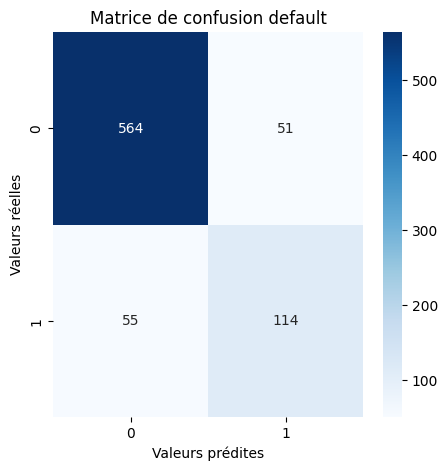

In [217]:
plotcm(y_true=test.pauvre, y_pred=y_pred, mod="default")

In [218]:
y_pred.values

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [219]:
y_proba.values

array([0.45864159, 0.02413607, 0.03326479, 0.94749361, 0.0256422 ,
       0.8564409 , 0.14942949, 0.6157192 , 0.25856194, 0.85886025,
       0.03954922, 0.15526916, 0.03292091, 0.90174508, 0.05980828,
       0.79971749, 0.06308964, 0.8080616 , 0.03033345, 0.96287191,
       0.72948402, 0.2165169 , 0.02955005, 0.4318192 , 0.19710189,
       0.03305554, 0.02322287, 0.6403771 , 0.77685094, 0.76532447,
       0.03754412, 0.07600468, 0.05373435, 0.18260562, 0.15821484,
       0.91870421, 0.72483665, 0.16200382, 0.64510757, 0.89919448,
       0.14632177, 0.79845524, 0.93128157, 0.89175647, 0.94066596,
       0.95658869, 0.05149207, 0.90283906, 0.03408448, 0.5959757 ,
       0.03387861, 0.85924602, 0.83717203, 0.03688733, 0.63128579,
       0.06281213, 0.78503805, 0.03161678, 0.06224579, 0.83718836,
       0.02370748, 0.05713771, 0.64309996, 0.02767899, 0.73697174,
       0.30274147, 0.02575081, 0.04603955, 0.02739349, 0.11573338,
       0.93224424, 0.8446573 , 0.11073105, 0.02889702, 0.32936

In [220]:
#test["prediction"] = y_pred.values

In [221]:
#test["prediction_proba"] = y_proba.values

In [222]:
#path_pred = "D:/Shares/DMCI/model_autogluon/model_v1"

In [223]:
#test.to_csv(path_pred+"/test_pred_urb_avec_proba.csv")

In [224]:
#test

In [225]:
#plotcm(y_true=test.pauvre, y_pred=test.prediction, mod="default")

In [226]:
#feat_imp = predictor.feature_importance(train)

In [227]:
#feat_imp

## DEPLOIEMENT ELEGERE

In [228]:
import pyreadstat

In [229]:
# Replace 'your_file.dta' with the path to your Stata file
df_eleg, meta_eleg = pyreadstat.read_dta("Bases - Projet Ciblage/base_Eleg.dta")

In [230]:
df_eleg.region.value_counts()

region
DIOURBEL       168
SAINT-LOUIS    165
FATICK         158
THIES          121
ZIGUINCHOR     117
TAMBACOUNDA    112
KOLDA          103
KAOLACK         95
DAKAR           87
MATAM           56
KAFFRINE        51
SEDHIOU         51
LOUGA           49
KEDOUGOU        40
Name: count, dtype: int64

In [231]:
reg_dict = {
    "DAKAR": 1,
    "THIES": 7,
    "FATICK": 9,
    "DIOURBEL": 3,
    "KAOLACK": 6,
    "KAFFRINE": 12,
    "TAMBACOUNDA": 5,
    "KEDOUGOU": 13,
    "SAINT-LOUIS": 4,
    "LOUGA": 8,
    "MATAM": 11,
    "SEDHIOU": 14,
    "ZIGUINCHOR": 2,
    "KOLDA": 10
}

In [232]:
# Create a new column 'region_code' by mapping the 'region' column to the 'reg_dict' dictionary
df_eleg['region_code'] = df_eleg['region'].map(reg_dict)

In [233]:
df_eleg['region_code'].value_counts()

region_code
3     168
4     165
9     158
7     121
2     117
5     112
10    103
6      95
1      87
11     56
12     51
14     51
8      49
13     40
Name: count, dtype: int64

In [234]:
# drop the 'region' column and rename the 'region_code' column to 'region'
df_eleg.drop('region', axis=1, inplace=True)
df_eleg.rename(columns={'region_code': 'region'}, inplace=True)

In [235]:
cat_col = ['frigo',
 'sexe',
 'region',
 'type_logement',
 'materiau_mur',
 'nature_sol',
 'ordinateur',
 'source_eau_ss',
 'activ12m',
 'ventilo',
 'evac_eau_usees',
 'voiture',
 'statut_occup',
 'type_sanitaire',
 'materiau_toit',
 'fer_charbon',
 'bonbonne_gaz',
 'eclairage',
 'mode_evac_ordure',
 'fer_electrique',
 'pauvre_eleg']

In [236]:
# convert to categorical data type for columns in 'rg_col'
df_eleg[cat_col] = df_eleg[cat_col].astype('category')

In [237]:
# tab the variable 'pauvre'
df_eleg["pauvre_eleg"].value_counts()

pauvre_eleg
0.0    719
1.0    654
Name: count, dtype: int64

In [238]:
# set "partage_sanitaire" as "object" type
df_eleg['partage_sanitaire'] = df_eleg['partage_sanitaire'].astype('object')

In [239]:
df_eleg.milieu.value_counts()

milieu
2    1030
1     343
Name: count, dtype: int64

In [240]:
# recode 'milieu' 2 : "rural", "1" : "urbain"
df_eleg['milieu'] = df_eleg['milieu'].replace({2: "rural", 1: "urbain"})

In [241]:
# save df_rural and df_urbain
#df_rural = df_eleg[df_eleg['milieu'] == "rural"]
df_urbain = df_eleg[df_eleg['milieu'] == "urbain"]

In [242]:
# transforme df_rural into autogluon tabular data
#df_rural = TabularDataset(df_rural)
df_urbain = TabularDataset(df_urbain)

In [243]:
predictor_best.decision_threshold

0.494

In [244]:
df_urbain = df_urbain.rename(columns={"pauvre_eleg":"pauvre"})

In [245]:
predictor_V_urb = TabularPredictor.load("AutogluonModels/ag-20250409_112132")
predictor_V_urb.evaluate(df_urbain, decision_threshold=0.5)

{'accuracy': 0.7405247813411079,
 'balanced_accuracy': 0.6256172839506173,
 'mcc': 0.30255013819302035,
 'roc_auc': 0.788395061728395,
 'f1': 0.44025157232704404,
 'precision': 0.5932203389830508,
 'recall': 0.35}

In [246]:
predictor_best.evaluate(df_urbain)

{'f1': 0.5,
 'accuracy': 0.7434402332361516,
 'balanced_accuracy': 0.6541563786008231,
 'mcc': 0.3373899990813699,
 'roc_auc': 0.7845679012345679,
 'precision': 0.5789473684210527,
 'recall': 0.44}

10 minute train : {'f1': 0.47953216374269003,
 'accuracy': 0.7405247813411079,
 'balanced_accuracy': 0.6432716049382716,
 'mcc': 0.32142498477133224,
 'roc_auc': 0.7770781893004116,
 'precision': 0.5774647887323944,
 'recall': 0.41}

In [247]:
y_pred_urb = predictor_best.predict(df_urbain)

In [248]:
y_proba_urb = predictor_best.predict_proba(df_urbain).iloc[:,1]

In [249]:
def plotcm(y_true, y_pred, mod, milieu):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title(f"Matrice de confusion {mod} {milieu}")
    plt.show()
    plt.savefig(f'{milieu}.png')


In [250]:
# change the type of "pauvre" to int
#df_urbain['pauvre'] = df_urbain['pauvre'].astype('int')

In [251]:
y_pred_urb.value_counts()

pauvre
0    267
1     76
Name: count, dtype: int64

In [252]:
# ajouter la colonne y_pred_urb à df_urbain
df_urbain['pauvre_pred_urb'] = y_pred_urb

In [253]:
# ajoute la colonne y_proba_urb à df_urbain
df_urbain['pauvre_proba_pred_urb'] = y_proba_urb

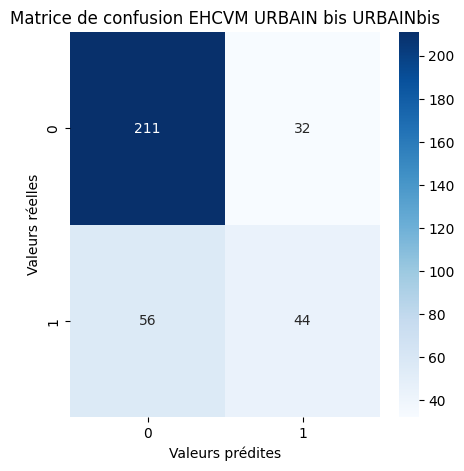

<Figure size 640x480 with 0 Axes>

In [254]:
plotcm(df_urbain['pauvre'], df_urbain["pauvre_pred_urb"], "EHCVM URBAIN bis", milieu="URBAINbis")

In [255]:
df_urbain.to_csv("deploie_gboost/df_urbain_apres_prediction.csv", index=False)

In [256]:
# chercher le meilleur seuil de prédiction

In [257]:
# prediction sur test

In [258]:
# sauvegarder la base test avec les prediction
